In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Loading data

In [2]:
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_est.csv")
gender = pd.read_csv("gender_submission.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Overall survival rate


In [5]:
print('Overall Survival Rate:',train['Survived'].mean())

('Overall Survival Rate:', 0.3838383838383838)


### 2. Data Cleaning and Features Choosing

In [6]:
# get_dummies function
def dummies(col,train,test):
    train_dum = pd.get_dummies(train[col])
    test_dum = pd.get_dummies(test[col])
    train = pd.concat([train, train_dum], axis=1)
    test = pd.concat([test,test_dum],axis=1)
    train.drop(col,axis=1,inplace=True)
    test.drop(col,axis=1,inplace=True)
    return train, test

# get rid of the useless cols
dropping = ['PassengerId', 'Name', 'Ticket']
train.drop(dropping,axis=1, inplace=True)
test.drop(dropping,axis=1, inplace=True)

### Survival graph of 3 classes

3    491
1    216
2    184
Name: Pclass, dtype: int64


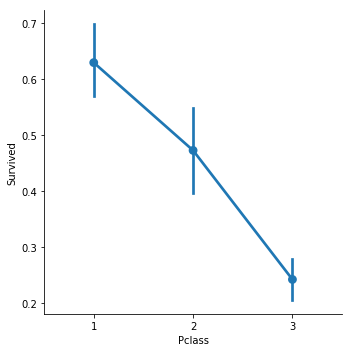

In [7]:
warnings.filterwarnings('ignore')
#pclass
# ensure no na contained
print(train.Pclass.value_counts(dropna=False))
sns.factorplot('Pclass', 'Survived',data=train, order=[1,2,3])
train, test = dummies('Pclass', train, test)

### Female survival rate is way better than the male

male      577
female    314
Name: Sex, dtype: int64


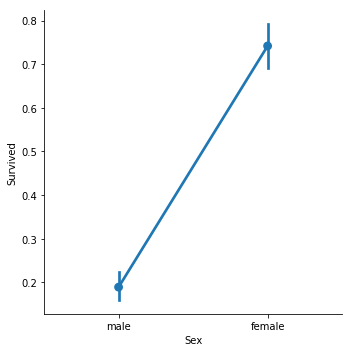

In [8]:
print(train.Sex.value_counts(dropna=False))
sns.factorplot('Sex','Survived', data=train)
train, test = dummies('Sex', train, test)

train.drop('male',axis=1,inplace=True)
test.drop('male',axis=1,inplace=True)

### dealing the missing data

In [9]:
#age 
nan_num = train['Age'].isnull().sum()
# there are 177 missing value, fill with random int
age_mean = train['Age'].mean()
age_std = train['Age'].std()
filling = np.random.randint(age_mean-age_std, age_mean+age_std, size=nan_num)
train['Age'][train['Age'].isnull()==True] = filling
nan_num = train['Age'].isnull().sum()

In [10]:
# dealing the missing val in test
nan_num = test['Age'].isnull().sum()
# 86 null
age_mean = test['Age'].mean()
age_std = test['Age'].std()
filling = np.random.randint(age_mean-age_std,age_mean+age_std,size=nan_num)
test['Age'][test['Age'].isnull()==True]=filling
nan_num = test['Age'].isnull().sum()

from the graph, we see that the survival rate of children is higher than other and the 15-30 survival rate is lower


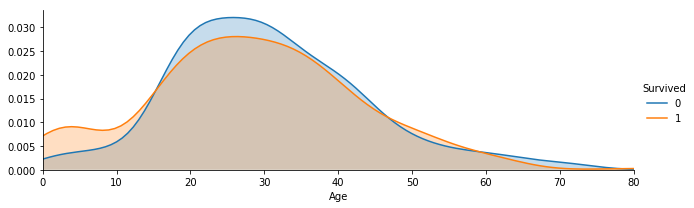

In [11]:
#look into the age col
s = sns.FacetGrid(train,hue='Survived',aspect=3)
s.map(sns.kdeplot,'Age',shade=True)
s.set(xlim=(0,train['Age'].max()))
s.add_legend()
print ("from the graph, we see that the survival rate of children is higher than other and the 15-30 survival rate is lower")

In [12]:
def under15(row):
    result = 0.0
    if row<15:
        result = 1.0
    return result
def young(row):
    result = 0.0
    if row>=15 and row<30:
        result = 1.0
    return result

In [13]:
train['under15'] = train['Age'].apply(under15)
test['under15'] = test['Age'].apply(under15)
train['young'] = train['Age'].apply(young)
test['young'] = test['Age'].apply(young)

train.drop('Age',axis=1,inplace=True)
test.drop('Age',axis=1,inplace=True)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


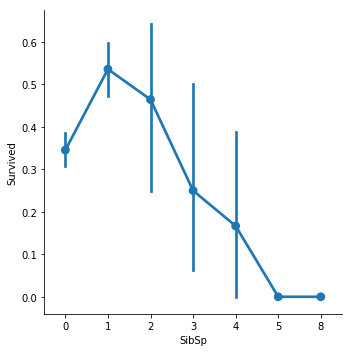

In [14]:
#family
# chek
print(train['SibSp'].value_counts(dropna=False))
sns.factorplot('SibSp','Survived',data=train,size=5)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


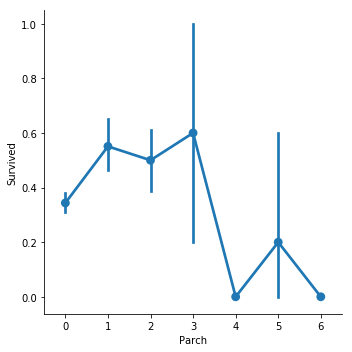

In [15]:
print(train['Parch'].value_counts(dropna=False))
sns.factorplot('Parch','Survived',data=train,size=5)

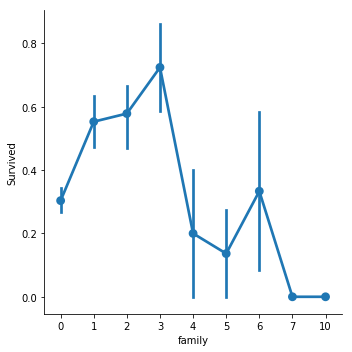

In [16]:
train['family'] = train['SibSp'] + train['Parch']
test['family'] = test['SibSp'] + test['Parch']
sns.factorplot('family','Survived',data=train,size=5)

'''through the plot, we suggest that with more family member, the survival rate will drop, we can create the new col
add up the parch and sibsp to check our theory''' 

In [17]:
train.drop(['SibSp','Parch'],axis=1,inplace=True)
test.drop(['SibSp','Parch'],axis=1,inplace=True)

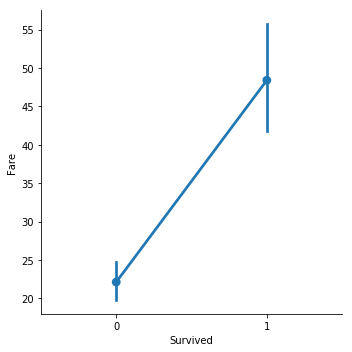

In [18]:
# fare
# checking null, found one in test group. leave it alone til we find out
# wether we should use this ft
train.Fare.isnull().sum()
test.Fare.isnull().sum()

sns.factorplot('Survived','Fare',data=train,size=5)
#according to the plot, smaller fare has higher survival rate, keep it
#dealing the null val in test
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [19]:
#Cabin
# checking missing val
# 687 out of 891 are missing, drop this col
train.Cabin.isnull().sum()
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

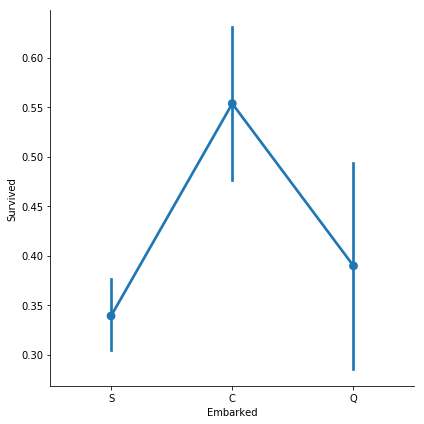

In [20]:
#Embark
train.Embarked.isnull().sum()

# 2 missing value
train.Embarked.value_counts()

# fill the majority val,'s', into missing val col
train['Embarked'].fillna('S',inplace=True)

sns.factorplot('Embarked','Survived',data=train,size=6)

# c has higher survival rate, drop the other two
train,test = dummies('Embarked',train,test)

train.drop(['S','Q'],axis=1,inplace=True)
test.drop(['S','Q'],axis=1,inplace=True)

In [21]:
# import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [22]:
def modeling(clf,ft,target):
    acc = cross_val_score(clf,ft,target,cv=kf)
    acc_lst.append(acc.mean())
    return 

In [23]:
accuracy = []
def ml(ft,target,time):
    accuracy.append(acc_lst)

    #logisticregression
    logreg = LogisticRegression()
    modeling(logreg,ft,target)
    
    #RandomForest
    rf = RandomForestClassifier(n_estimators=50,min_samples_split=4,min_samples_leaf=2)
    modeling(rf,ft,target)
    
    #svc
    svc = SVC()
    modeling(svc,ft,target)
    
    #knn
    knn = KNeighborsClassifier(n_neighbors = 3)
    modeling(knn,ft,target)
    
    # see the coefficient
    logreg.fit(ft,target)
    feature = pd.DataFrame(ft.columns)
    feature.columns = ['Features']
    feature["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
    print(feature)
    return

### Testing no.1, using all the feature

In [24]:
train_ft=train.drop('Survived',axis=1)
train_y=train['Survived']

#set kf
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft,train_y,'test_1')

  Features  Coefficient Estimate
0     Fare              0.004054
1        1              0.404402
2        2             -0.238423
3        3             -1.262615
4   female              2.683645
5  under15              1.756806
6    young              0.243337
7   family             -0.308007
8        C              0.364979


### # Testing 2, lose young

In [25]:
train_ft_2=train.drop(['Survived','young'],axis=1)
test_2 = test.drop('young',axis=1)
train_ft.head()

# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst=[]
ml(train_ft_2,train_y,'test_2')


  Features  Coefficient Estimate
0     Fare              0.004285
1        1              0.386195
2        2             -0.207867
3        3             -1.202922
4   female              2.690898
5  under15              1.645827
6   family             -0.311682
7        C              0.376629


### Testing 3, lose young, c

In [27]:
train_ft_3=train.drop(['Survived','young','C'],axis=1)
test_3 = test.drop(['young','C'],axis=1)
train_ft.head()

# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft_3,train_y,'test_3')

  Features  Coefficient Estimate
0     Fare              0.004920
1        1              0.438557
2        2             -0.225821
3        3             -1.194444
4   female              2.694665
5  under15              1.679459
6   family             -0.322922


### Testing 4, no FARE

In [29]:
train_ft_4=train.drop(['Survived','Fare'],axis=1)
test_4 = test.drop(['Fare'],axis=1)
train_ft.head()
# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft_4,train_y,'test_4')

  Features  Coefficient Estimate
0        1              0.572528
1        2             -0.266727
2        3             -1.335212
3   female              2.694469
4  under15              1.726421
5    young              0.262213
6   family             -0.269012
7        C              0.427798


### Testing 5, get rid of c 

In [32]:
train_ft_5=train.drop(['Survived','C'],axis=1)
test_5 = test.drop('C',axis=1)

# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft_5,train_y,'test_5')

  Features  Coefficient Estimate
0     Fare              0.004647
1        1              0.456924
2        2             -0.257928
3        3             -1.257587
4   female              2.686593
5  under15              1.793516
6    young              0.254593
7   family             -0.318130


### Testing 6, lose Fare and young

In [34]:
train_ft_6=train.drop(['Survived','Fare','young'],axis=1)
test_6 = test.drop(['Fare','young'],axis=1)
train_ft.head()
# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft_6,train_y,'test_6')

  Features  Coefficient Estimate
0        1              0.562814
1        2             -0.235606
2        3             -1.274657
3   female              2.702955
4  under15              1.604597
5   family             -0.270284
6        C              0.442288


In [35]:
accuracy_df=pd.DataFrame(data=accuracy,
                         index=['test1','test2','test3','test4','test5','test6'],
                         columns=['logistic','rf','svc','knn'])
accuracy_df

,logistic,rf,svc,knn
test1,0.797980,0.809203,0.745230,0.747475
test2,0.791246,0.818182,0.764310,0.757576
test3,0.796857,0.812570,0.763187,0.757576
test4,0.796857,0.810325,0.832772,0.778900
test5,0.794613,0.812570,0.760943,0.741863
test6,0.790123,0.823793,0.831650,0.775533


In [36]:
'''
According to the accuracy chart, 'features test4 with svc'
got best performance
'''  
#test4 svc as submission
svc = SVC()
svc.fit(train_ft_4,train_y)
svc_pred = svc.predict(test_4)
print(svc.score(train_ft_4,train_y))


0.8327721661054994


In [39]:
test = pd.read_csv('Titanic_est.csv')
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": svc_pred
    })
submission.to_csv("kaggle.csv", index=False)

In [42]:
len(submission[submission.Survived==1])

159

In [43]:
len(submission[submission.Survived==0])

259